# Project: Investigating the digital divide

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> In this project we will analyse data concerning communication trends in the world, especially those related to Internet and the Information and Communication Technologies (ICT´s). I want to focuse this analysis in the spread of Internet around the world and observe in detail the digital divide phenomenon concerning the political factors. The digital divide is affecting some specific areas around the world and it´s a factor of inequality that has a great impact on the wealth and opportunities of part of the world population. 

> The digital divide is a phenomenon linked to the inequally spread of the New Information and Communication Technologies (NICT´s). 
Some authors have analyse this phenomenon describing different factors that catalizes the digital divides: The geographical factor (some areas around the world are include in the so call "digital dessert"), the digital illiteracy (also called e-illiteracy, includes large of population living without basic digital knowledge. It´s related to sociodemographical factors) and political factors related to the political systems established in each country.

> In this case study I want to explore the main question concerning the spread of Internet and democratisation: ¿Is the spread of Internet a factor that is improving the democratisation standards around the world?

>Nowadays there is an open discussion between utopians and distopians in relation to Internet as a source of welfare. Some researchers and authors are supporting the vision that ICT´s are improving our life standards including the democratisation of our socities, while other consider that we are building the frame for the development of a new way of population control undermining the democratic rules.    

>The main questions about the digital divide is how is the digital divide evolving? Is geographical digital divide diminishing or is the digital divide increasing? Is the digital divide changing their boundaries or are these boundaries still fixed? Is there a relation between the digital divide and the democratisations standards of a country?


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

>For the first part of data wrangling I have loaded three files to "Jupyter" from the Gapminder webpage:
one concerning Internet user in each country per 100 people, a second one concerning the total number of Internet user in each country(these two files are provided by the World Bank), and a third one concerning the evolution of the democratisation level for each country following the data provided by the "Polity IV Project" and its democratisation score.

>In a second step I call the panda functionality ".read_excel" to read one of the file through the ".head()" function.
Displaying the head of the dataset we can observe how the data are structured.

In [2]:
excel_file = "Internet_user_per_100.xlsx"

internet_user_100= pd.read_excel(excel_file)
internet_user_100.head()

,Internet users (per 100 people),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004092,0.079875,0.097164,1.130398,1.947423,1.751202,1.688485,3.246306,3.654114,4.58067
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,0.0,NaN,NaN,NaN,NaN,0.011169,0.032197,0.048594,0.065027,...,0.390081,0.971900,2.420388,6.043891,9.609991,15.036115,23.860000,41.200000,45.000000,49.00000
4,Algeria,0.0,NaN,NaN,NaN,0.000361,0.001769,0.001739,0.010268,0.020239,...,1.591641,2.195360,4.634475,5.843942,7.375985,9.451191,10.180000,11.230000,12.500000,14.00000


>In this case the rows represents the countries and the columns the years. So that we can see that we will have the evolution of Internet users per 100 people.

>I will do the same with the other two files. To analyze if there are some remarkable differences in their structure.

In [3]:
excel_file_2 ="Internet_user_total.xlsx"
internet_user_total = pd.read_excel(excel_file_2)
internet_user_total.head()

,"Internet users, total number",1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1123.920517,22569.277533,2.824412e+04,3.380450e+05,5.988651e+05,5.537710e+05,5.490559e+05,1.085510e+06,1256469.72,NaN
1,Albania,0.0,NaN,NaN,NaN,NaN,350.820117,1002.157509,1502.476346,2002.216783,...,12052.645369,30194.039918,7.563375e+04,1.898870e+05,3.033497e+05,4.765945e+05,7.590813e+05,1.315402e+06,1441927.80,NaN
2,Algeria,0.0,NaN,NaN,NaN,100.090832,500.465235,500.469039,3002.798156,6005.526744,...,500441.425787,700615.293472,1.501387e+06,1.921982e+06,2.462986e+06,3.204578e+06,3.504773e+06,3.924904e+06,4433526.00,NaN
3,American Samoa,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,0.0,NaN,NaN,NaN,NaN,NaN,995.756049,1979.716334,4424.113974,...,7774.565416,9780.916489,2.020683e+04,2.929038e+04,3.908782e+04,5.768109e+04,5.783693e+04,6.571155e+04,68739.84,NaN


In [4]:
excel_file_3 ="indicatorpolityiv.xlsx"
democrat = pd.read_excel(excel_file_3)
democrat.head()

,"Democracy, based on PolityIV",1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,7.0,7.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.0,-3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


>What we can observe is that both files have a similar data structure as the first. The header display a sequence of year until 2011 and each row displays that for a country. This will be helpful for matching the different files. 

>The next step is to have a deeper look to datasets. I will use the ".info()" function. To know how many countries are displayed in each dataset. 

In [5]:
internet_user_100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 23 columns):
Internet users (per 100 people)    275 non-null object
1990                               204 non-null float64
1991                               39 non-null float64
1992                               50 non-null float64
1993                               64 non-null float64
1994                               90 non-null float64
1995                               138 non-null float64
1996                               171 non-null float64
1997                               180 non-null float64
1998                               186 non-null float64
1999                               193 non-null float64
2000                               195 non-null float64
2001                               196 non-null float64
2002                               198 non-null float64
2003                               193 non-null float64
2004                               196 non-null float64
2005

In [6]:
internet_user_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 23 columns):
Internet users, total number    213 non-null object
1990                            204 non-null float64
1991                            39 non-null float64
1992                            50 non-null float64
1993                            65 non-null float64
1994                            91 non-null float64
1995                            138 non-null float64
1996                            171 non-null float64
1997                            181 non-null float64
1998                            187 non-null float64
1999                            194 non-null float64
2000                            195 non-null float64
2001                            196 non-null float64
2002                            198 non-null float64
2003                            193 non-null float64
2004                            196 non-null float64
2005                            198 non-null float64

In [7]:
democrat.drop(democrat.columns[1:191], axis=1, inplace=True)
democrat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 23 columns):
Democracy, based on PolityIV    275 non-null object
1990                            168 non-null float64
1991                            165 non-null float64
1992                            164 non-null float64
1993                            164 non-null float64
1994                            164 non-null float64
1995                            163 non-null float64
1996                            163 non-null float64
1997                            163 non-null float64
1998                            163 non-null float64
1999                            163 non-null float64
2000                            163 non-null float64
2001                            162 non-null float64
2002                            163 non-null float64
2003                            163 non-null float64
2004                            163 non-null float64
2005                            163 non-null flo

>What we can observe is that the first dataset, the dataset for Internet user per cent is really interesting, because we will find data from countries all around the world (274 countries) for more than two decades (22 years)! Not all the data are available for all the countries all the years, but enough to analyse the evolution of the expansion of Internet around the world.
The second dataset the data set concerning the total population of Internet users in each country displays less countries (212), but it can be helpful to have an insight in some specific countries.
The third dataset has also 275, displaying 274 countries. In this case we have a lot of columns, because this study covers far more years than needed in our analysis, but it reaches to cover until 2011. For that reason I have drop the columns from 1800-1989 through the drop function ".drop()".

>The next step is to find out how are the data structured, if they are some patterns in the dataset info in itself and if all the data we have are reliable and consistent. To do this I will run the ".describe()" function

In [8]:
internet_user_100.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
count,204.000000,39.000000,50.000000,64.000000,90.000000,138.000000,171.000000,180.000000,186.000000,193.000000,...,198.000000,193.000000,196.000000,198.000000,198.000000,200.000000,203.000000,201.000000,194.000000,187.000000
mean,0.024674,0.279766,0.398131,0.468481,0.670015,0.953208,1.458778,2.468666,3.938363,5.913335,...,13.632016,16.177784,18.576754,20.807232,23.482540,25.924841,28.450416,31.287106,35.259908,39.081514
std,0.111245,0.440105,0.623463,0.748843,1.276122,2.106044,3.196877,5.011012,7.371745,10.290322,...,18.435372,20.392648,21.831766,23.051079,24.320795,25.523696,26.265168,26.941357,27.662325,28.357331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.206664,0.883126
25%,0.000000,0.003333,0.003524,0.005942,0.003558,0.007701,0.012206,0.032606,0.067379,0.146669,...,1.032808,1.473556,2.135031,3.000388,4.192418,4.742987,6.215000,7.300000,10.031362,12.000000
50%,0.000000,0.048745,0.073528,0.125212,0.054731,0.083984,0.192725,0.334983,0.629826,1.119909,...,4.620871,6.462274,8.417571,10.647885,13.303745,16.490000,21.000000,25.000000,31.037599,36.150000
75%,0.000000,0.253522,0.421822,0.533093,0.716139,0.743247,1.226580,2.200066,3.473189,5.443129,...,19.304356,23.620420,28.562334,34.537302,38.056939,40.990939,46.020000,51.500000,54.700000,62.811293
max,0.796411,1.407791,2.215962,2.782298,6.766409,13.900337,18.266152,27.651975,36.470771,42.803316,...,78.916368,83.198294,84.147084,87.002639,88.693224,88.900338,90.774134,92.180609,95.625784,96.618362


In [9]:
internet_user_total.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
count,2.040000e+02,3.900000e+01,5.000000e+01,6.500000e+01,9.100000e+01,1.380000e+02,1.710000e+02,1.810000e+02,1.870000e+02,1.940000e+02,...,1.980000e+02,1.930000e+02,1.960000e+02,1.980000e+02,1.980000e+02,2.000000e+02,2.030000e+02,1.980000e+02,1.920000e+02,0.0
mean,1.287728e+04,1.098271e+05,1.370369e+05,1.521124e+05,2.220502e+05,2.818409e+05,4.234324e+05,6.412301e+05,9.676208e+05,1.403206e+06,...,3.273547e+06,3.933031e+06,4.516334e+06,5.095414e+06,5.740383e+06,6.777217e+06,7.714835e+06,8.936537e+06,1.053149e+07,NaN
std,1.396790e+05,4.739707e+05,6.282693e+05,7.356874e+05,1.346306e+06,2.104740e+06,3.414730e+06,4.497291e+06,6.272398e+06,7.694465e+06,...,1.414905e+07,1.573893e+07,1.728538e+07,1.862976e+07,2.007004e+07,2.430459e+07,2.854655e+07,3.370022e+07,3.944326e+07,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.361146e+03,NaN
25%,0.000000e+00,8.252318e+02,6.990966e+02,1.197075e+03,2.700668e+02,2.274329e+02,5.002353e+02,1.200642e+03,2.267513e+03,5.321097e+03,...,2.221727e+04,3.099945e+04,3.893678e+04,4.976746e+04,6.947041e+04,8.157452e+04,9.775500e+04,1.140008e+05,1.776165e+05,NaN
50%,0.000000e+00,7.084443e+03,1.247415e+04,1.002535e+04,1.012205e+04,2.233912e+03,3.001421e+03,7.498964e+03,1.487871e+04,2.891836e+04,...,1.191486e+05,1.559542e+05,2.324658e+05,3.392482e+05,4.836016e+05,5.662098e+05,7.010632e+05,9.252343e+05,1.370816e+06,NaN
75%,0.000000e+00,6.499814e+04,5.018153e+04,5.999173e+04,7.125717e+04,5.154627e+04,5.984301e+04,1.000004e+05,1.951773e+05,2.483318e+05,...,9.934531e+05,1.499871e+06,2.232839e+06,2.599926e+06,3.002440e+06,3.336998e+06,4.182701e+06,4.576817e+06,5.450528e+06,NaN
max,1.988024e+06,2.975535e+06,4.453200e+06,5.924598e+06,1.281192e+07,2.460056e+07,4.423269e+07,5.893568e+07,8.305303e+07,1.001255e+08,...,1.695767e+08,1.797180e+08,1.904301e+08,2.017430e+08,2.064934e+08,2.267134e+08,3.001903e+08,3.857886e+08,4.600780e+08,NaN


In [10]:
democrat.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
count,168.000000,165.000000,164.000000,164.000000,164.000000,163.000000,163.000000,163.000000,163.000000,163.000000,...,163.000000,163.000000,163.000000,163.000000,163.000000,162.000000,163.000000,163.000000,163.000000,163.000000
mean,0.315476,1.290909,1.951220,2.064024,2.329268,2.300613,2.196319,2.190184,2.343558,2.564417,...,3.276074,3.233129,3.361963,3.619632,3.680982,3.660494,3.785276,3.785276,3.883436,4.036810
std,7.107506,7.038239,6.974806,6.913833,6.824810,6.803353,6.917377,6.896548,6.753491,6.635145,...,6.534135,6.508845,6.570437,6.450389,6.463292,6.425071,6.375825,6.307689,6.234504,6.159294
min,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,-7.000000,-6.000000,-5.000000,-5.250000,-5.000000,-5.000000,-5.500000,-5.000000,-4.000000,-3.000000,...,-2.000000,-2.500000,-2.500000,-2.000000,-2.500000,-2.000000,-2.000000,-2.000000,-1.500000,-1.000000
50%,0.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,6.000000,6.000000,6.000000,6.000000,7.000000,6.500000,7.000000,7.000000,6.000000,7.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000,8.500000,8.500000,8.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


>The description of the three files is showing that we have very reliable data for our analysis of at least 21 years, between 1990 and 2011. From the three files the most reliable and consistent data are provided in the files concerning Internet user per 100 people and the data of the democratisation score.

>The file of total Internet population at first sight won´t be so relevant, because of the missing data in the last year. Anyway I will keep this file for this analysis as a secondary source and I´m going to focus my analysis using the Internet per 100 people file and the democratisation score file.

>We won´t have data to compare all the countries with Internet access with their democratisation score, because we have Internet access data for a larger number of countries between 193 and 203, but only deomocratisations scores for 163 for the years 2002 to 2011.

### Data Cleaning 

>In general the data available are very clean. But some processes has to be perform to clean some specific issues.

>The first step for cleaning the data has been done yet. The columns we didn´t need in the file concerning democratisations scores has been delete before, because the file had too much columns, so that I decided to delete these. So that we have the same amount of years of both files to work with. (From 1990 to 2011)
>For doing this I had run the function ".drop" (democrat.drop(democrat.columns[1:191], axis=1, inplace=True))


>The second step I thought it could be helpful to have a deeper look into the data was to deal with the non available data (NaN´s) through the ".dropna" and ".fillna", but I decided no to use this function, because the quantity of "Nan´s" in the Internet_user_100 data was high.

>**Note**: Pandas discard the "NaN´s" when calculating some operations like the mean that I used in this case study. I consider that this is helpful for having a global vision, but when having a deeper analysis on different countries, it´s relevant to have a look also on the missing data and to consider why are this data missing, when it´s possible.

>In the selected countries below (Albania, Egypt, China and Venezuela) the missing data appeared in the first years concerning "Internet user per 100 people" and maybe this is related to the research design and the data collection, but if we look to the example of Afghanistan (Democracy, based on PolityIV    Afghanistan
1990                                     -8
1991                                     -8
1992                                      0
1993                                      0
1994                                      0
1995                                      0
1996                                     -7
1997                                     -7
1998                                     -7
1999                                     -7
2000                                     -7
2001                                    NaN
2002                                    NaN
2003                                    NaN
2004                                    NaN
2005                                    NaN
2006                                    NaN
2007                                    NaN
2008                                    NaN
2009                                    NaN
2010                                    NaN
2011                                    NaN
Name: 1, dtype: object) concerning the democratisation score we see that the missing data appeared in the last decade and we should analyze why are these data missing. Are these data missing, because the problems in the data collection or is it related to specific issues that affects this country? We should take a deeper look to this circumstances.

>What I decided is to select a few countries (Albania, Egypt, China and Venezuela) from both databases to support my arguments. I will do this below through the ".iloc" function.



<a id='eda'></a>
## Exploratory Data Analysis


<a id='eda'></a>

### Research Question 1: Is the Internet user rate increasing since 1990?

>To have a view all over the years. I decided to display the data for each year. And watch the evolution of the internet user rate per 100 people. I will call the ".hist()" function to do this.

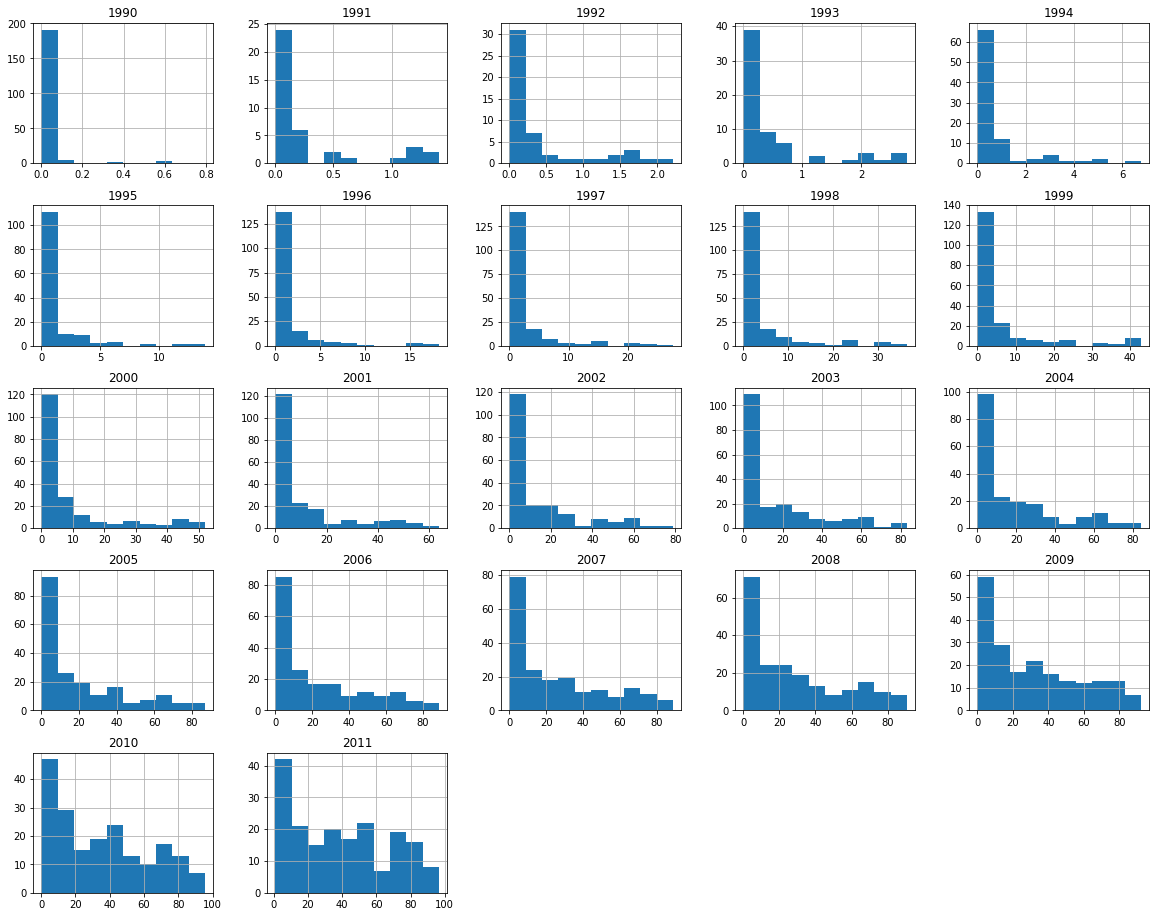

In [11]:
internet_user_100.hist(figsize = (20,16));


>What we see in the sequence of graphs is that year by year more countries are accessing to Internet and the Internet users per 100 people are increasing in percentage.

>After analyzing the graphs we can take a look on the mean of Internet user per 100 people for each year through the ".mean()" function

In [12]:
internet_user_100.mean()

1990     0.024674
1991     0.279766
1992     0.398131
1993     0.468481
1994     0.670015
1995     0.953208
1996     1.458778
1997     2.468666
1998     3.938363
1999     5.913335
2000     8.699769
2001    10.707761
2002    13.632016
2003    16.177784
2004    18.576754
2005    20.807232
2006    23.482540
2007    25.924841
2008    28.450416
2009    31.287106
2010    35.259908
2011    39.081514
dtype: float64

>What we observe when we display the mean of the "Internet users per 100 people" is the increase of this rate year by year. Starting in 1990 near cero percent increasing to ca. 9% in the first decade and between 2002 and 2011 tripling their values. From 13,6% in 2002 to 39,1% in 2011.

>To have another point of view we can display this data in a bar graph to see how the spread of Internet is evolving.

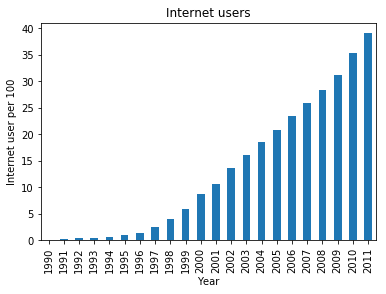

In [13]:
internet_user_100.mean().plot(kind='bar')
plt.title("Internet users")
plt.ylabel("Internet user per 100")
plt.xlabel("Year");

>If we analyze this visualization, the mean for each year regarding the percentage of Internet user globally, we observe that there is clear relation between the pass of the years and the spread of Internet. Between 1990 and 2011 the growth in the percentage of people the accessing to Internet has been constant without any setback and without touching the highest rate. 

<a id='eda'></a>

### Research Question 2: Is the spread of Internet evolving following the same patterns as the democratisation scores?


>Let´s look at the mean for each year concerning the democratisation score.

In [14]:
democrat.mean()

1990    0.315476
1991    1.290909
1992    1.951220
1993    2.064024
1994    2.329268
1995    2.300613
1996    2.196319
1997    2.190184
1998    2.343558
1999    2.564417
2000    2.963190
2001    3.166667
2002    3.276074
2003    3.233129
2004    3.361963
2005    3.619632
2006    3.680982
2007    3.660494
2008    3.785276
2009    3.785276
2010    3.883436
2011    4.036810
dtype: float64

>Concerning the values of the democratisation score we have analysed until now, we observed an increase from 3,28 to 4,04 in the democratisation scores all around the world. (Note: The democratisation score is a based on a range of scores that goes from -10 for the less democratic states to +10 for the most democratic states).
>As we see in the sequence of graphs from 1990 to 2011, there is a trend that shows that year after year less countries are in the negativ spectrum of the chart and more countries appeared in the positive part of the chart.  

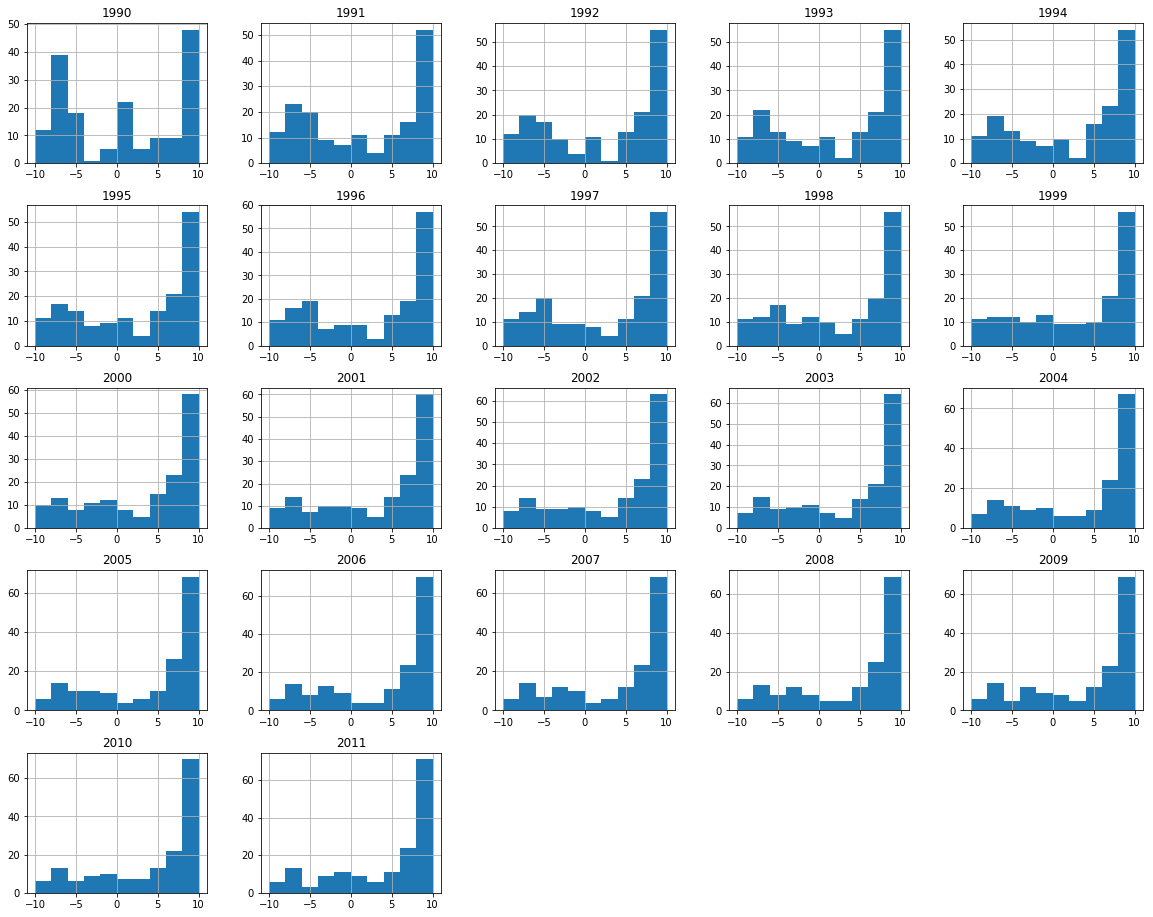

In [15]:
democrat.hist(figsize=(20,16));

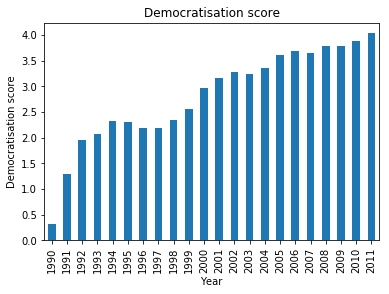

In [16]:
democrat.mean().plot(kind='bar')
plt.title("Democratisation score")
plt.ylabel("Democratisation score")
plt.xlabel("Year");

>If we look the data between 1990 and 2011 what we see is an increase in the democratisation score each year, but this increase isn´t constant. There is a slight retrocession globally between the years 1994 and 1997, again in 2003 and 2007.

>The first conclusion would be that there isn´t a direct relation between the increase of access to Internet per 100 people and democratisation, because in one hand there is a direct relation between the pass of the years and the increase of the Internet access, but there is no relation between the pass of the years and a constant increase in the democratisation scores.

>But I want to take a look and compare some data from both databases.
I will extract the data for different countries in four continents: a European Country (Albania), an African Country (Egypt), an Asiatic country (China) and an American country (Venezuela). Using the ".iloc"function.
Then I will compare their data and their evolution case by case.

In [17]:
democrat.iloc[3]


Democracy, based on PolityIV    Albania
1990                                  1
1991                                  1
1992                                  5
1993                                  5
1994                                  5
1995                                  5
1996                                  0
1997                                  5
1998                                  5
1999                                  5
2000                                  5
2001                                  5
2002                                  7
2003                                  7
2004                                  7
2005                                  9
2006                                  9
2007                                  9
2008                                  9
2009                                  9
2010                                  9
2011                                  9
Name: 3, dtype: object

In [18]:
internet_user_100.iloc[3]

Internet users (per 100 people)      Albania
1990                                       0
1991                                     NaN
1992                                     NaN
1993                                     NaN
1994                                     NaN
1995                               0.0111687
1996                               0.0321968
1997                               0.0485939
1998                               0.0650274
1999                                0.081437
2000                                0.114097
2001                                0.325798
2002                                0.390081
2003                                  0.9719
2004                                 2.42039
2005                                 6.04389
2006                                 9.60999
2007                                 15.0361
2008                                   23.86
2009                                    41.2
2010                                      45
2011      

>Albania has until 1995 no reliable data of Internet user pero 100 people. But from then on until 2011 the data are reliable and shows an increase, but this increase is especially strong from 2005 until 2011. Passing from 2,42% Internet user to 49%.
>The democratisation process in Albania shows a similar path than the Internet spread in this country. This pattern was only interrupted in 1996. In 1996 the parliamentary election in Albania didn´t met the international standards.

In [19]:
democrat.iloc[65]

Democracy, based on PolityIV    Egypt
1990                               -6
1991                               -6
1992                               -6
1993                               -6
1994                               -6
1995                               -6
1996                               -6
1997                               -6
1998                               -6
1999                               -6
2000                               -6
2001                               -6
2002                               -6
2003                               -6
2004                               -6
2005                               -3
2006                               -3
2007                               -3
2008                               -3
2009                               -3
2010                               -3
2011                               -2
Name: 65, dtype: object

In [20]:
internet_user_100.iloc[65]

Internet users (per 100 people)          Egypt
1990                                         0
1991                                       NaN
1992                                       NaN
1993                               0.000975791
1994                                0.00638327
1995                                 0.0313196
1996                                 0.0614669
1997                                 0.0904802
1998                                  0.147987
1999                                  0.290445
2000                                  0.641265
2001                                  0.838946
2002                                      2.72
2003                                   4.03789
2004                                   5.15067
2005                                   11.6984
2006                                   12.5528
2007                                     16.05
2008                                     18.01
2009                                     24.28
2010         

>Egypt follows a straight path combining the spread of the Internet and the increase of the Internet user among their population with the increase of democratisation along the period between 1993 (the starting year with reliable data) and 2011. In 2011 achieving the highest rates of Internet user per 100 people the so call "Arab Spring" took place in several countries. The "Arab Spring" was a revolutionary movement that some researchers and authors related to the Internet spread in those countries. We should be catious and wait until we have new data about the evolution of these variables from 2011 and on. 

In [21]:
democrat.iloc[44]

Democracy, based on PolityIV    China
1990                               -7
1991                               -7
1992                               -7
1993                               -7
1994                               -7
1995                               -7
1996                               -7
1997                               -7
1998                               -7
1999                               -7
2000                               -7
2001                               -7
2002                               -7
2003                               -7
2004                               -7
2005                               -7
2006                               -7
2007                               -7
2008                               -7
2009                               -7
2010                               -7
2011                               -7
Name: 44, dtype: object

In [22]:
internet_user_100.iloc[44]

Internet users (per 100 people)          China
1990                                         0
1991                                       NaN
1992                                       NaN
1993                               0.000170147
1994                                0.00117761
1995                                0.00499226
1996                                 0.0131739
1997                                 0.0325996
1998                                  0.169502
1999                                  0.711999
2000                                   1.78502
2001                                   2.65221
2002                                   4.61557
2003                                   6.22404
2004                                   7.32522
2005                                   8.54858
2006                                   10.5517
2007                                   16.0437
2008                                   22.6618
2009                                   28.9766
2010         

In the case of China what we see is that the advance in the digitalisation of society has affected the democratisations score. The democratisation score continues to be negativ (-7) without any change in this 22 years, but the Internet user population has increase to 38,4% of the total population

In [23]:
democrat.iloc[247]

Democracy, based on PolityIV    Venezuela
1990                                    9
1991                                    9
1992                                    8
1993                                    8
1994                                    8
1995                                    8
1996                                    8
1997                                    8
1998                                    8
1999                                    7
2000                                    7
2001                                    6
2002                                    6
2003                                    6
2004                                    6
2005                                    6
2006                                    5
2007                                    5
2008                                    5
2009                                   -3
2010                                   -3
2011                                   -3
Name: 247, dtype: object

In [24]:
internet_user_100.iloc[246]

Internet users (per 100 people)    Venezuela
1990                                       0
1991                                     NaN
1992                               0.0120682
1993                                0.041553
1994                               0.0554527
1995                                 0.12217
1996                                 0.24823
1997                                0.391014
1998                                 1.38466
1999                                 2.84211
2000                                 3.36475
2001                                 4.64455
2002                                 4.92083
2003                                 7.51819
2004                                 8.42795
2005                                 12.5941
2006                                 15.2798
2007                                 20.9137
2008                                 25.9935
2009                                 32.8566
2010                                  37.559
2011      

Venezuela is a clear example that to shows that there is no relation between the advance of Internet and the democratisation of a society. Venezuela is following the opposite way that many researchers and authors expected. The data of Internet user have increased from 1992 until 2011 achieving a 40,44% in the spread of Internet in their population, but the democratisation score has decreased from 9 to -3. This shows that a spread in Internet doesn´t guarantee the advance in the democratisation of societies.

<a id='conclusions'></a>
## Conclusions

>As we saw the two variables: democratisation score and Internet user per 100 people have improved since 1990 until 2011. 

>But when we approach this question we need to be cautious an analyse the data, without falling into hasty conclusions. At first sight we can be tempted to conclude that there is a relation between the the spread of Internet and the increase in the democratisation score. The increase of people accessing Internet is consider to affect the welfare, but we can´t conclude, following the data shown, that the increase in the Internet has a direct impact on the democratisation scores around the world.

>We can also conclude that both variables didn´t follow the same patterns in the period analyze. The democratisation scores suffered some setbacks, while the Internet users per 100 increase their values constantly.

>Also if we go deeper in the analysis and take a look in some singular cases we will see clear that there in no relation between the digitalisation of the societies and the democratisation of the countries. We could see this especially in the cases of China and Venezuela and other deeper analysis has to be done in cases as we see in Egypt.

>So that we can conclude that there isn´t a direct relation between the increase of access to Internet per 100 people and democratisation, because in one hand there is a direct relation between the pass of the years and the increase of the Internet access, but there is no relation between the pass of the years and a constant increase in the democratisation scores.

>Nonetheless further analysis should be perform to have a deeper insight of this question and continue the research trying to answer secondary questions like: How is the quality of access to Internet in each country? How are the sociodemogrphics of the Internet user in each country. How is the legislation about censorship in ICT´s  in each country... Taking into account other variables regarding their political system and their access to the ICT´s.


In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0